In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# t-SNE Plot
This Notebooks is a part of DHH24 Hackathon and group Luxury Books. The Notebook includes code for plotting t-SNE1 vs t-SNE2 that have been obtained from multivariate image embedding analysis (PCA). Color mapping is based on price intervals of 50 units.

Author: Juho Hotari

### Data download and histograms

In [265]:
df = pd.read_csv('df_tsne_price.csv')
classes = pd.read_csv('imagens_classes.csv')

In [266]:
# Remove everything after underscore from image name
classes['imagem'] = classes['imagem'].str.split('_').str[0]

# Rename column imagem to Image
classes.rename(columns={'imagem': 'Image'}, inplace=True)

In [267]:
# Convert 'Image' columns to strings
classes['Image'] = classes['Image'].astype(str)
df['Image'] = df['Image'].astype(str)

In [268]:
# Check dataframe sizes
print(df.shape)
print(classes.shape)

(1036, 6)
(735, 2)


In [ ]:
classes.classe.value_counts()

Icons                  271
Tables                 142
Geometry                97
Detailed engravings     88
Scenes                  71
Portraits               43
Music                   23
Name: classe, dtype: int64

In [216]:
# Merge the DataFrames
merged_df = pd.merge(df, classes, on='Image')

In [217]:
print('Smallest price: ', df.total_price.min())
print('Largest price: ', df.total_price.max())

Smallest price:  6.0
Largest price:  756.0


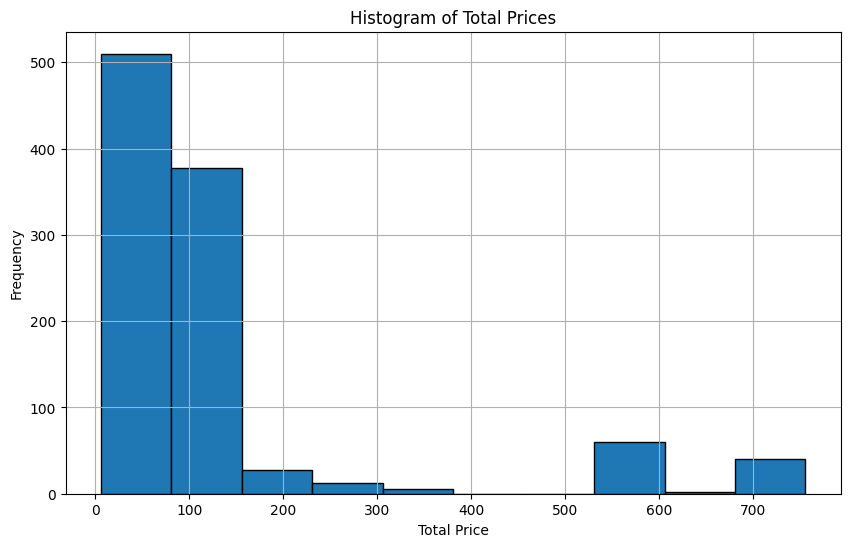

In [218]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['total_price'], bins=10, edgecolor='black')
plt.title('Histogram of Total Prices')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

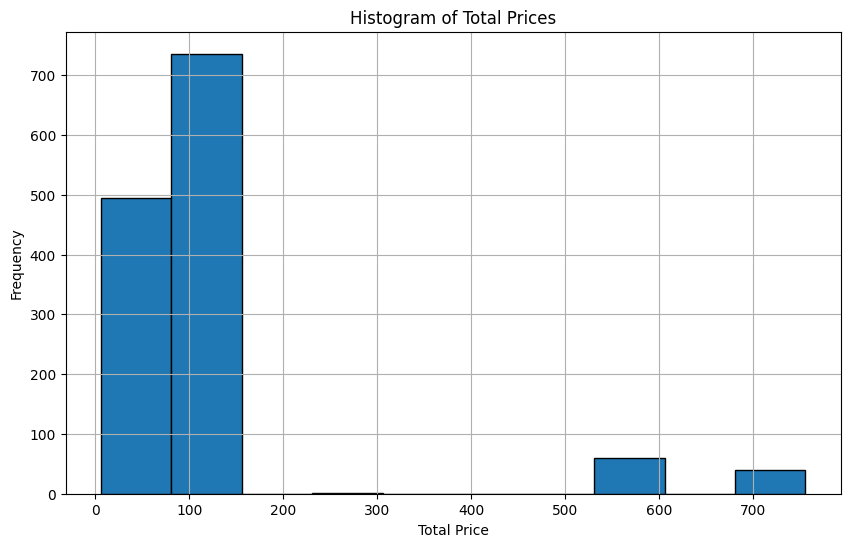

In [219]:
# Plotting the histogram for merged df
plt.figure(figsize=(10, 6))
plt.hist(merged_df['total_price'], bins=10, edgecolor='black')
plt.title('Histogram of Total Prices')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Scatterplot without Classes

In [236]:
# Define the price intervals and their corresponding explanations
bins = [0, 13, 36, 120, np.inf]
labels = ['Cheap', 'Average', 'Upper Middle', 'Expensive']
category_explanations = {
    'Cheap': '<13 pence',
    'Average': '13-36 pence',
    'Upper Middle': '37-120 pence',
    'Expensive': '>120 pence'
}

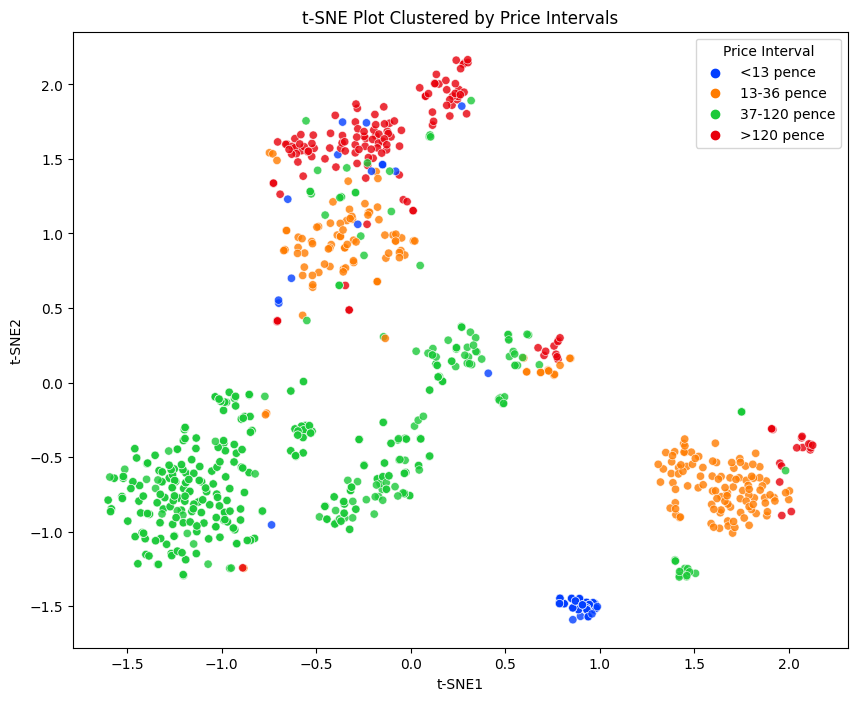

In [224]:
# Create a new column with the price intervals
df['price_category'] = pd.cut(df['total_price'], bins=bins, labels=labels, include_lowest=True)

# Map the interval labels to their explanations
df['price_explanation'] = df['price_category'].map(category_explanations)

# Reverse the color palette
palette = 'bright'

# Plot t-SNE plot
plt.figure(figsize=(10, 8))

sns.scatterplot(
    x='t-SNE1', y='t-SNE2', 
    hue='price_explanation', 
    palette=palette, 
    data=df,
    alpha=0.8
)

# Adding plot title and labels
plt.title('t-SNE Plot Clustered by Price Intervals')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title='Price Interval')
plt.savefig('t-SNE_price_class_final.png')
plt.show()

### Scatterplot with Classes

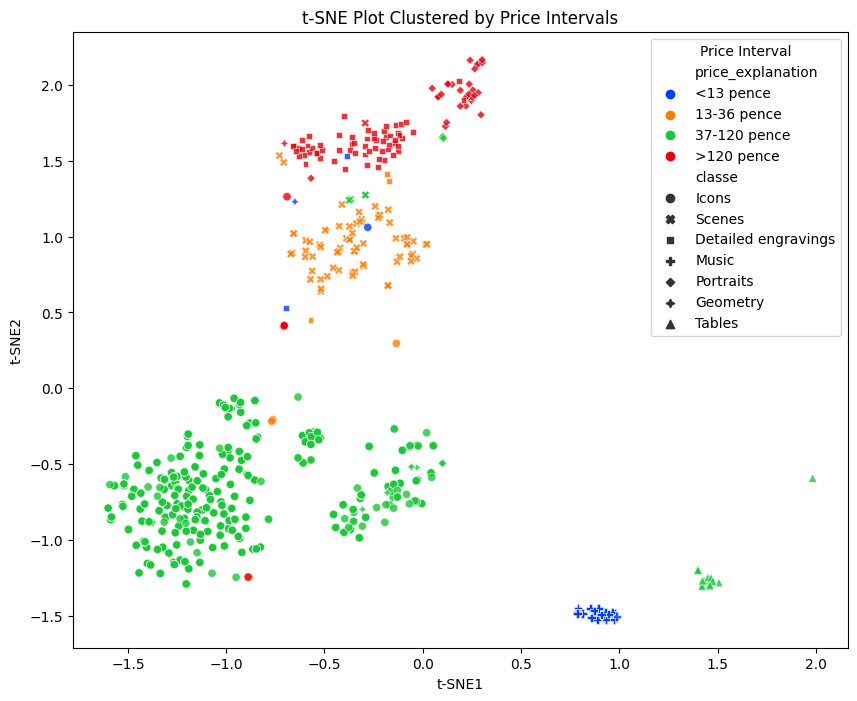

In [237]:
# Create a new column with the price intervals
merged_df['price_category'] = pd.cut(merged_df['total_price'], bins=bins, labels=labels, include_lowest=True)

# Map the interval labels to their explanations
merged_df['price_explanation'] = merged_df['price_category'].map(category_explanations)

# Reverse the color palette
palette = 'bright'

# Plot t-SNE plot
plt.figure(figsize=(10, 8))

sns.scatterplot(
    x='t-SNE1', y='t-SNE2', 
    hue='price_explanation', 
    palette=palette, 
    data=merged_df,
    alpha=0.8,
    style='classe'
)

# Adding plot title and labels
plt.title('t-SNE Plot Clustered by Price Intervals')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title='Price Interval')
plt.savefig('t-SNE_price_class_final.png')
plt.show()

### Scatterplot including 'None' for datapoints without a Class

In [269]:
# Perform the merge
new_df = pd.merge(df, classes, on='Image', how='left')

# Fill NaN values in 'classe' column with 'None'
new_df['classe'] = new_df['classe'].fillna('None')

In [271]:
new_df.drop_duplicates()

,t-SNE1,t-SNE2,Image,ecco_id,estc_id,total_price,classe
0,1.417672,-0.570615,36220180000350,362201800,T133351,18.0,None
1,0.727015,0.084381,85750090003020,857500900,T210906,30.0,None
2,-1.202113,-0.388765,171230130101070,1712301301,T77908,90.0,Icons
6,-0.079671,0.950519,133230130002160,1332301300,N36448,36.0,Scenes
7,-0.127229,1.560660,157060010202850,1570600102,T59882,600.0,Detailed engravings
...,...,...,...,...,...,...,...
1609,-1.084399,-0.707689,171230130101090,1712301301,T77908,90.0,Icons
1613,1.812073,-0.817271,36220180002340,362201800,T133351,18.0,None
1614,-0.246664,-0.557692,126280120000320,1262801200,N3839,60.0,Icons
1615,-1.249278,-0.760728,171230130100680,1712301301,T77908,90.0,Icons


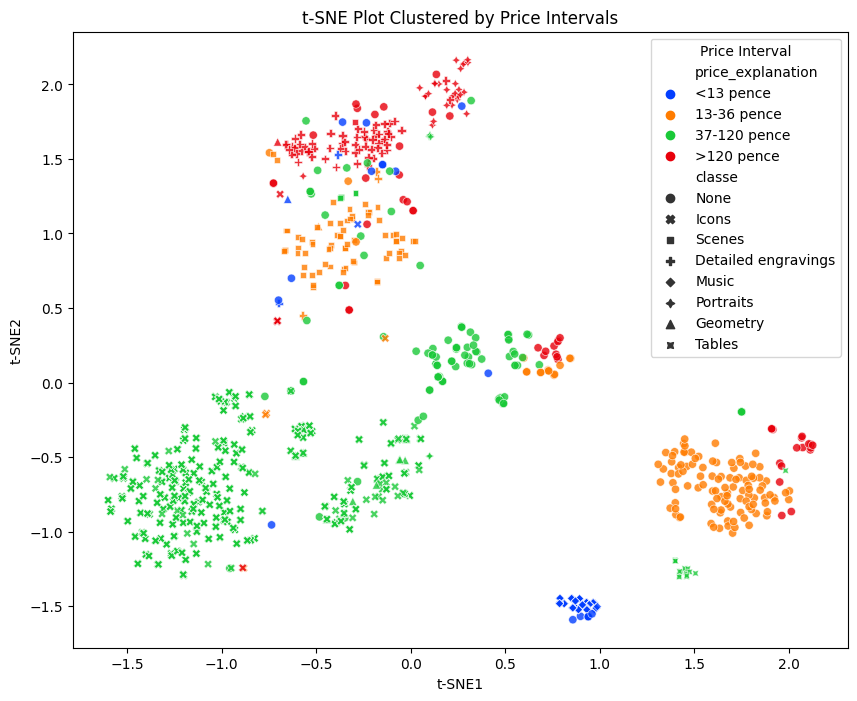

In [272]:
# Create a new column with the price intervals
new_df['price_category'] = pd.cut(new_df['total_price'], bins=bins, labels=labels, include_lowest=True)

# Map the interval labels to their explanations
new_df['price_explanation'] = new_df['price_category'].map(category_explanations)

# Reverse the color palette
palette = 'bright'

# Plot t-SNE plot
plt.figure(figsize=(10, 8))

sns.scatterplot(
    x='t-SNE1', y='t-SNE2', 
    hue='price_explanation', 
    palette=palette, 
    data=new_df,
    alpha=0.8,
    style='classe'
)

# Adding plot title and labels
plt.title('t-SNE Plot Clustered by Price Intervals')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(title='Price Interval')
plt.savefig('t-SNE_price_class_final.png')
plt.show()